In [378]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad

In [379]:
mean = np.array([0, 1, 2])
cov = np.array([[1, 0.25, 0.5], [0.25, 1, 0.15], [0.5, 0.15, 1]])
samples = np.random.multivariate_normal(mean, cov, size=100000)

<Axes: >

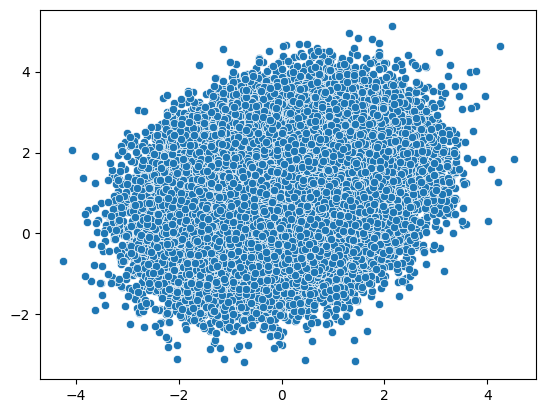

In [380]:
sns.scatterplot(x=samples[:,0], y=samples[:,1])

In [396]:
len([x for x in samples if np.max(x) < 4]) / len(samples)

0.9754

In [392]:
def get_density(x):
    p = 0

    for i in range(samples.shape[1]):
        t1 = sps.norm.pdf(x, mean[i], cov[i][i])

        mu_x = (
            np.delete(mean, i) + (x - mean[i]) * np.delete(cov, i, axis=0)[:, i] / cov[i][i]
        )
        cov_x = (
            np.delete(np.delete(cov, i, axis=1), i, axis=0)
            - np.delete(cov, i, axis=0)[:, i]
            @ np.delete(cov, i, axis=0)[:, i].T
            / cov[i][i]
        )

        t2 = sps.multivariate_normal.cdf(
            np.zeros(samples.shape[1] - 1) + x,
            mean=mu_x,
            cov=cov_x,
        )

        p += t1 * t2

    return p

In [ ]:
def get_cdf(x):
    p = 0

    for i in range(samples.shape[1]):
        t1 = sps.norm.pdf(x, mean[i], cov[i][i])

        mu_x = (
            np.delete(mean, i) + (x - mean[i]) * np.delete(cov, i, axis=0)[:, i] / cov[i][i]
        )
        cov_x = (
            np.delete(np.delete(cov, i, axis=1), i, axis=0)
            - np.delete(cov, i, axis=0)[:, i]
            @ np.delete(cov, i, axis=0)[:, i].T
            / cov[i][i]
        )

        t2 = sps.multivariate_normal.cdf(
            np.zeros(samples.shape[1] - 1) + x,
            mean=mu_x,
            cov=cov_x,
        )

        p += t1 * t2

    return p

In [395]:
quad(get_density, -15, 4)

(0.9826592842659478, 3.126428328753566e-10)

In [384]:
cov, mean

(array([[1.  , 0.25, 0.5 ],
        [0.25, 1.  , 0.15],
        [0.5 , 0.15, 1.  ]]),
 array([0, 1, 2]))

In [398]:
sps.mvn.mvnun()

AttributeError: `scipy.stats.mvn` has no attribute `mvnun`; furthermore, `scipy.stats.mvn` is deprecated and will be removed in SciPy 2.0.0.

In [386]:
np.delete(np.delete(cov, i, axis=1), i, axis=0)

array([[1.  , 0.25],
       [0.25, 1.  ]])

In [387]:
np.delete(cov, i, axis=0)[:, i].shape

(2,)

In [388]:
cov

array([[1.  , 0.25, 0.5 ],
       [0.25, 1.  , 0.15],
       [0.5 , 0.15, 1.  ]])